The Office is an American mockumentary sitcom television series that depicts the everyday work lives of office employees at the Scranton, Pennsylvania, branch of the fictional Dunder Mifflin Paper Company. It aired on NBC from March 24, 2005, to May 16, 2013, spanning a total of nine seasons. Based on the 2001–2003 BBC series of the same name created by Ricky Gervais and Stephen Merchant, it was adapted for American television by Greg Daniels, a veteran writer for Saturday Night Live, King of the Hill, and The Simpsons. It was co-produced by Daniels's Deedle-Dee Productions and Reveille Productions (later Shine America), in association with Universal Television. The original executive producers were Daniels, Gervais, Merchant, Howard Klein, and Ben Silverman, with numerous others being promoted in later seasons.

Like its British counterpart, the series was filmed in a single-camera setup without a studio audience or a laugh track to simulate the look of an actual documentary. The series debuted on NBC as a mid-season replacement and aired 201 episodes for its run. The Office originally featured Steve Carell, Rainn Wilson, John Krasinski, Jenna Fischer, and B. J. Novak as the main cast; however, the series experienced numerous changes to its ensemble cast during its run. Notable stars outside the original main cast include Ed Helms, Amy Ryan, Mindy Kaling, Craig Robinson, James Spader, Ellie Kemper, and Catherine Tate.

The Office was met with mixed reviews during its short first season, but the following seasons, particularly those featuring Carell, received significant acclaim from television critics as the show's characters, content, structure and tone diverged considerably from the British version. These seasons were included on several critics' year-end top TV series lists, winning several awards such as a Peabody Award in 2006, two Screen Actors Guild Awards, a Golden Globe Award for Carell's performance, and four Primetime Emmy Awards, including one for Outstanding Comedy Series, in 2006. The eighth season was criticized for a decline in quality. Many saw Carell's departure in season seven as a contributing factor; however, the ninth and final season ended the series' run with a generally positive response. The series finale, which originally aired on May 16, 2013, was viewed by an estimated 5.69 million viewers and garnered critical acclaim. In 2016, Rolling Stone named The Office one of the 100 greatest television shows of all time.

In [1]:
!pip install pytrends

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16124 sha256=ad16ba6f5b6830971c8a2f6ff26e068aecaf0bcb26f811b734ad3261d3af0a50
  Stored in directory: c:\users\casper\appdata\local\pip\cache\wheels\87\a9\a3\c190a7e0872639762e92cf3a84d6845ed086e10966533faf42
Successfully built pytrends


In [3]:
import holoviews as hv
from wordcloud import WordCloud
from pytrends.request import TrendReq
import plotly.express as px
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
dataset = pd.read_csv('D:/G-PYTHON/Python 42/Data science/Data Science Projects/The Office EDA/Dataset/the_office_series.csv.xls', index_col=[0])
table = hv.Table(dataset)
table.opts(height=250,width=1200)

:Table   [Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers]

In [8]:
table = hv.Table(dataset.describe().T.reset_index())
table.opts(height=150,width=700)

:Table   [index,count,mean,std,min,25%,50%,75%,max]

In [9]:
import plotly.io as pio
pio.renderers.default='notebook'

In [10]:
kw_list = ["The Office"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')

In [11]:
fig = px.choropleth(pytrends.interest_by_region(resolution='COUNTRY',inc_geo_code=True).reset_index(),
                                color="The Office", 
                                color_continuous_scale='Blues',
                                locations = "geoName",
                                locationmode="country names",
                                projection="natural earth")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},dragmode=False, coloraxis_showscale=False)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
print("Figure: Google search trend for The Office")

Figure: Google search trend for The Office


In [12]:
fig = px.line(pytrends.interest_over_time().iloc[:,:1].reset_index(), 
              x='date', 
              y='The Office')
fig.update_layout(legend_title_text='',paper_bgcolor="white",plot_bgcolor='rgba(0,0,0,0)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='silver')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='silver')
fig.show()
print("Figure: Google search trend for The Office")

Figure: Google search trend for The Office


In [13]:
fig = px.pie(pytrends.related_queries()["The Office"]['top'], values='value', names='query',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend_title_text='Related Queries')
fig.show()

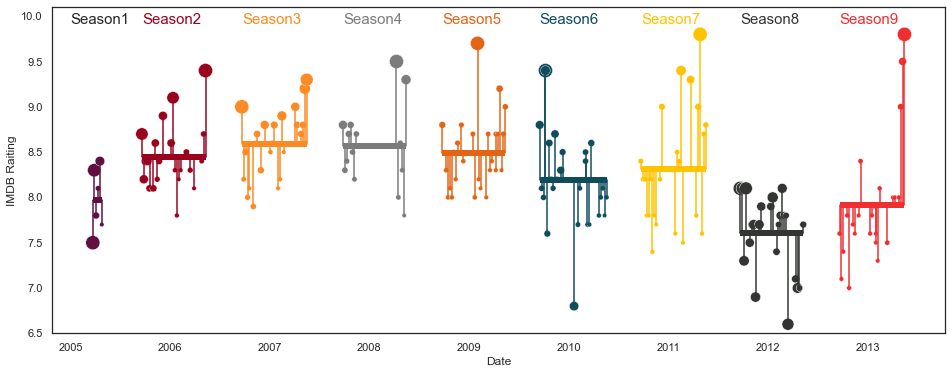

In [14]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
palette = ["#5f0f40","#9a031e","#fb8b24","#7C7C7C","#e36414","#0f4c5c","#FFC300","#333533","#ee2e31"]
c = 0
fig = plt.figure(figsize=(16,6))
for season in dataset["Season"].unique():
    bottom = dataset.query("Season=={}".format(season))["Ratings"].mean()
    x = dataset.query("Season=={}".format(season))["Date"].values
    values = dataset.query("Season=={}".format(season))["Ratings"].values
    
    plt.stem(x, values, bottom=bottom, linefmt=palette[c], basefmt=palette[c], markerfmt=" ")
    plt.hlines(y=bottom, xmin=x.min(), xmax=x.max(), lw=6, color=palette[c])
    sns.scatterplot(data = dataset.query("Season=={}".format(season)), 
                    x="Date", y="Ratings", size="Votes",sizes=(20, 200),color=palette[c],legend=False)

    plt.ylim(6.5,10.1)
    if c== 0:
        plt.text(x=pd.Timestamp('2005-01-01 00:00:00'),y=9.92,s="Season{}".format(c+1), fontsize=15)
    else:
        plt.text(x=x.min(),y=9.92,s="Season{}".format(c+1), fontsize=15, color=palette[c])
    c = c + 1
plt.xlabel("Date")
plt.ylabel("IMDB Raiting")
plt.show()

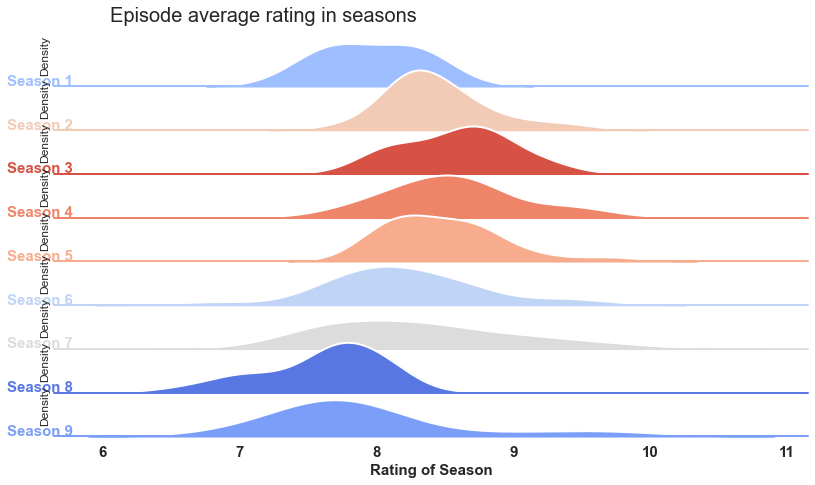

In [15]:
sr = dataset.groupby('Season')['Ratings'].mean().reset_index()
df = dataset[["Season","Ratings"]]
df = pd.merge(df, sr, how="left", on="Season")
df.columns = ["Season","Ratings", "Mean Ratings"]

season_dict= {1: 'Season 1',
              2: 'Season 2',
              3: 'Season 3',
              4: 'Season 4',
              5: 'Season 5',
              6: 'Season 6',
              7: 'Season 7',
              8: 'Season 8',
              9: 'Season 9'}


# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=9)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df, row='Season', hue='Mean Ratings', aspect=15, height=0.75, palette=pal)
# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Ratings',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Ratings', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(5.3, 0.02, season_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
#we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Rating of Season', fontweight='bold', fontsize=15)
g.fig.suptitle('Episode average rating in seasons',
               ha='right',
               fontsize=20,
               fontweight=20)
plt.show()

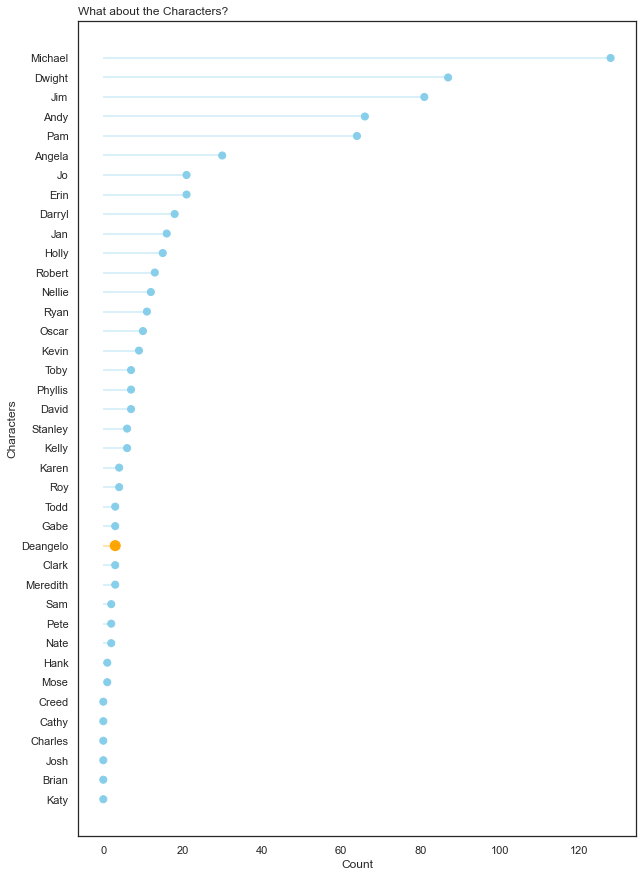

In [16]:
EpisodeAbout = {"Characters":["Michael",
"Jim",
"Pam",
"Dwight",
"Erin",
"Kelly",
"Angela",
"Ryan",
"Jan",
"Andy",
"Karen",
"Creed",
"Kevin",
"Phyllis",
"Darryl",
"Oscar",
"Toby",
"Holly",
"Robert",
"Katy",
"Cathy",
"Stanley",
"Nellie",
"Meredith",
"Gabe",
"Mose",
"Pete",
"Todd",
"Roy",
"Charles",
"Deangelo",
"David",
"Josh",
"Clark",
"Nate",
"Brian",
"Jo",
"Sam",
"Hank"],
"Count":[]}

for character in EpisodeAbout["Characters"]:
    query = """
    SELECT 
    * 
    FROM dataset
    WHERE About LIKE '%{}%'
    """.format(character)
    EpisodeAbout["Count"].append(len(ps.sqldf(query, locals())))

df = pd.DataFrame(EpisodeAbout)
ordered_df = df.sort_values(by='Count')
my_range=range(1,len(df.index)+1)
my_color=np.where(ordered_df ['Characters']=='Deangelo', 'orange', 'skyblue')
my_size=np.where(ordered_df ['Characters']=='Deangelo', 100, 50)
plt.figure(figsize=(10,15))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Count'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Count'], my_range, color=my_color, s=my_size, alpha=1)
plt.yticks(my_range, ordered_df['Characters'])
plt.title("What about the Characters?", loc='left')
plt.xlabel('Count')
plt.ylabel('Characters')
plt.show()

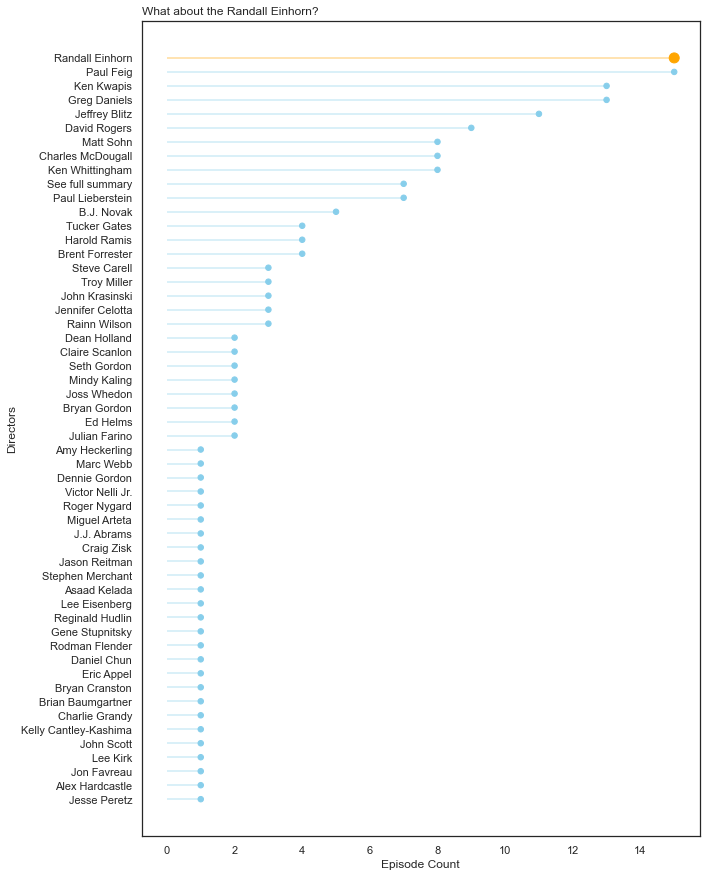

In [17]:
df = dataset["Director"].value_counts().reset_index()
df.columns = ['Director', 'Count']
ordered_df = df.sort_values(by='Count')
my_range=range(1,len(df.index)+1)
my_color=np.where(ordered_df ['Director']=='Randall Einhorn', 'orange', 'skyblue')
my_size=np.where(ordered_df ['Director']=='Randall Einhorn', 100, 30)
plt.figure(figsize=(10,15))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Count'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Count'], my_range, color=my_color, s=my_size, alpha=1)
plt.yticks(my_range, ordered_df['Director'])
plt.title("What about the Randall Einhorn?", loc='left')
plt.xlabel('Episode Count')
plt.ylabel('Directors')
plt.show()

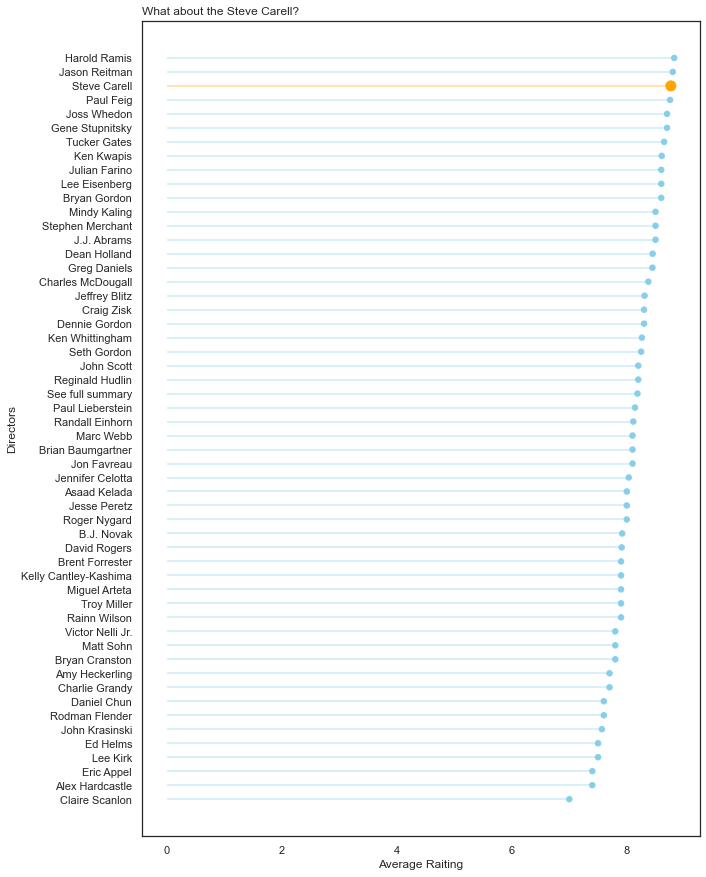

In [20]:
df = dataset.groupby("Director")["Ratings"].mean().reset_index()
ordered_df = df.sort_values(by='Ratings')
my_range=range(1,len(df.index)+1)
my_color=np.where(ordered_df ['Director']=='Steve Carell', 'orange', 'skyblue')
my_size=np.where(ordered_df ['Director']=='Steve Carell', 100, 30)
plt.figure(figsize=(10,15))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Ratings'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Ratings'], my_range, color=my_color, s=my_size, alpha=1)
plt.yticks(my_range, ordered_df['Director'])
plt.title("What about the Steve Carell?", loc='left')
plt.xlabel('Average Raiting')
plt.ylabel('Directors')
plt.show()

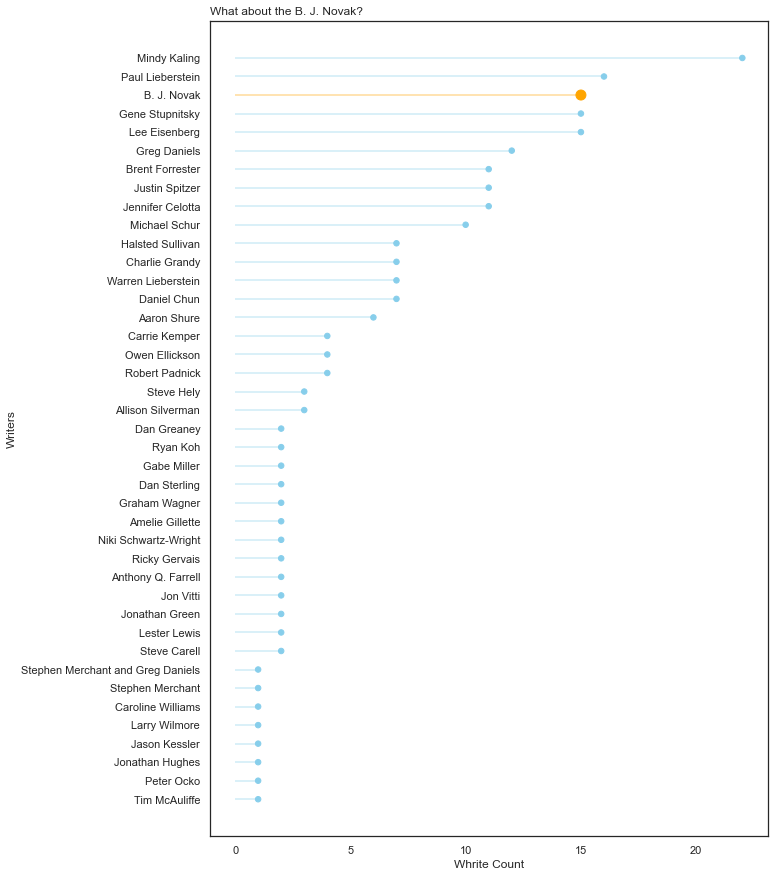

In [19]:
writer_list = list()
for writers in dataset["Writers"].str.split("|"):
    for writer in writers:
        writer_list.append(writer.lstrip().rstrip())

df = pd.Series(writer_list).value_counts().reset_index()
df.columns = ["Writers", "Count"]

ordered_df = df.sort_values(by='Count')
my_range=range(1,len(df.index)+1)
my_color=np.where(ordered_df ['Writers']=='B. J. Novak', 'orange', 'skyblue')
my_size=np.where(ordered_df ['Writers']=='B. J. Novak', 100, 30)
plt.figure(figsize=(10,15))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Count'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Count'], my_range, color=my_color, s=my_size, alpha=1)
plt.yticks(my_range, ordered_df['Writers'])
plt.title("What about the B. J. Novak?", loc='left')
plt.xlabel('Whrite Count')
plt.ylabel('Writers')
plt.show()

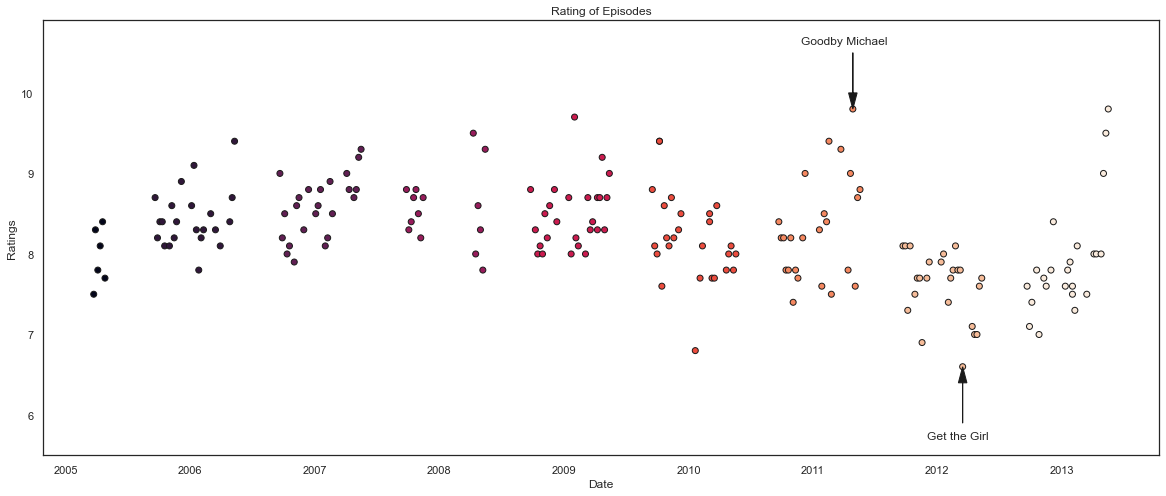

In [21]:
xs = dataset["Date"]
ys = dataset["Ratings"]
cs = dataset["Season"]
plt.figure(figsize=(20,8))
plt.scatter(xs, ys, c=cs, edgecolor="k")
plt.arrow(pd.Timestamp('2011-04-28 00:00:00'), 10.5, 0.0, -0.5, fc="k", ec="k",head_width=25, head_length=0.2)

plt.arrow(pd.Timestamp('2012-03-15 00:00:00'), 5.9, 0.0, 0.5, fc="k", ec="k",head_width=25, head_length=0.2)
plt.text(x=pd.Timestamp('2010-11-28 00:00:00'), y=10.6, s="Goodby Michael")
plt.text(x=pd.Timestamp('2011-12-01 00:00:00'), y=5.7, s="Get the Girl")
plt.ylim([5.5,10.9])
plt.title("Rating of Episodes")
plt.xlabel("Date")
plt.ylabel("Ratings")
plt.show()

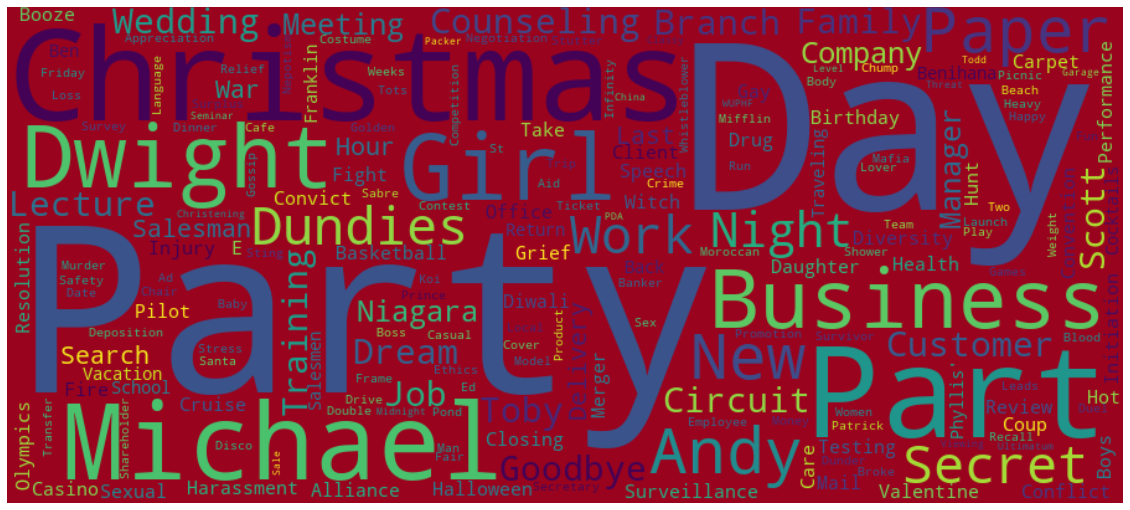

In [22]:
text = ""
for words in dataset["EpisodeTitle"].str.split(" "):
    for word in words:
        text = text + ' ' + word
wordcloud = WordCloud(width=900, height=400, background_color="#9a031e").generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

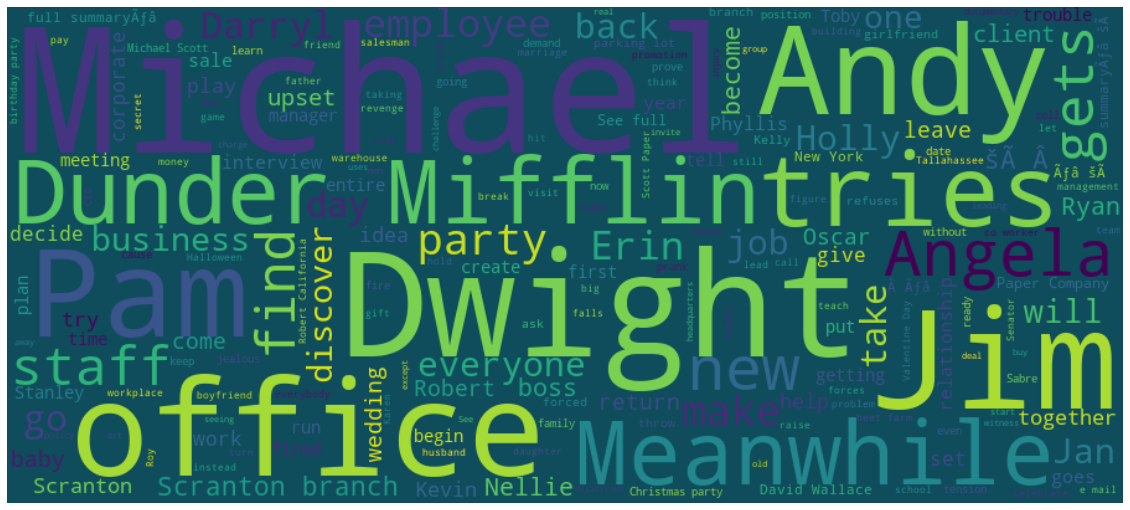

In [23]:
text = ""
for words in dataset["About"].str.split(" "):
    for word in words:
        text = text + ' ' + word
wordcloud = WordCloud(width=900, height=400, background_color="#0f4c5c").generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [24]:
df = dataset[["Season","EpisodeTitle","Ratings"]].sort_values("Ratings",ascending=False).head(20).reset_index(drop=True)
table = hv.Table(df)
table.opts(height=530,width=400)

:Table   [Season,EpisodeTitle,Ratings]

In [25]:
df = dataset[["Season","EpisodeTitle","Ratings"]].sort_values("Ratings",ascending=True).head(20).reset_index(drop=True)
table = hv.Table(df)
table.opts(height=530,width=400)

:Table   [Season,EpisodeTitle,Ratings]

In [26]:
df = dataset[["Season","EpisodeTitle","Viewership"]].sort_values("Viewership",ascending=False).head(20).reset_index(drop=True)
table = hv.Table(df)
table.opts(height=530,width=400)

:Table   [Season,EpisodeTitle,Viewership]

In [27]:
df = dataset[["Season","EpisodeTitle","Viewership"]].sort_values("Viewership",ascending=True).head(20).reset_index(drop=True)
table = hv.Table(df)
table.opts(height=530,width=400)

:Table   [Season,EpisodeTitle,Viewership]